In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps
import matplotlib.path as mpath

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

#import iris
#import iris.iterate
#import iris.coords
#import iris.plot as iplt
import gsw

In [2]:
# load ROMS avg output
ds = xr.open_dataset("/scratch/project_2000789/boeiradi/waom10extend_shflim_S_0.25Q/output_01-20yr/ocean_avg_0020.nc")
#print(output.variables.keys()) # get all variable names

temp = ds.variables["temp"]
salt = ds.variables["salt"]
print(temp.shape)
m_len = temp[:,0,0,0].size
k_len = temp[0,:,0,0].size
i_len = temp[0,0,:,0].size
j_len = temp[0,0,0,:].size

ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])

if ds.Vtransform == 1:
    Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
    z_rho = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
    print("Vtransform=1")
elif ds.Vtransform == 2:
    Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
    z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho
    print("Vtransform=2")
ds.coords['z_rho'] = z_rho # put z_rho into ds dataset

# read grid file for lon/lat coordinates
dg = xr.open_dataset("/scratch/project_2000339/boeiradi/waom10_frc/waom10extend_grd.nc")

lat_rho = dg.variables["lat_rho"]
lon_rho = dg.variables["lon_rho"]
ds.coords['lat_rho']=lat_rho # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho # put lon_rho into ds dataset

# read waom10_swflx file for (E-P fluxes)
dfw = xr.open_dataset("/scratch/project_2000339/boeiradi/waom10_frc/waom10extend_swflux.nc")

dshf = xr.open_dataset("/scratch/project_2000339/boeiradi/waom10_frc/waom10extend_shflux_0.25Q.nc")


dfw

(12, 31, 560, 630)
Vtransform=2


<xarray.Dataset>
Dimensions:   (eta_rho: 560, swf_time: 365, xi_rho: 630)
Coordinates:
  * swf_time  (swf_time) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    swflux    (swf_time, eta_rho, xi_rho) float64 ...

In [3]:
ds

<xarray.Dataset>
Dimensions:        (boundary: 4, eta_psi: 559, eta_rho: 560, eta_u: 560, eta_v: 559, ocean_time: 12, s_rho: 31, s_w: 32, tracer: 2, xi_psi: 629, xi_rho: 630, xi_u: 629, xi_v: 630)
Coordinates:
    Vtransform     int32 2
    hc             float64 250.0
  * s_rho          (s_rho) float64 -0.9839 -0.9516 -0.9194 ... -0.04839 -0.01613
  * s_w            (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.06452 -0.03226 0.0
    Cs_r           (s_rho) float64 -0.9995 -0.997 ... -0.0008464 -9.329e-05
    Cs_w           (s_w) float64 ...
    h              (eta_rho, xi_rho) float64 4.05e+03 4.274e+03 ... 4.96e+03
    x_rho          (eta_rho, xi_rho) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    y_rho          (eta_rho, xi_rho) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    x_u            (eta_u, xi_u) float64 ...
    y_u            (eta_u, xi_u) float64 ...
    x_v            (eta_v, xi_v) float64 ...
    y_v            (eta_v, xi_v) float64 ...
    x_psi          (eta_psi, xi_psi) float64 ...
    y_psi          (eta_psi, xi_psi) float64 ...
  * ocean_time     (ocean_time) datetime64[ns] 2026-01-11T05:00:00 ... 2026-1...
    z_rho          (ocean_time, eta_rho, xi_rho, s_rho) float64 -4.044e+03 .....
    lat_rho        (eta_rho, xi_rho) float64 ...
    lon_rho        (eta_rho, xi_rho) float64 ...
Dimensions without coordinates: boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables:
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         datetime64[ns] ...
    nHIS           int32 ...
    ndefHIS        int32 ...
    nRST           int32 ...
    ntsAVG         int32 ...
    nAVG           int32 ...
    ndefAVG        int32 ...
    ntsDIA         int32 ...
    nDIA           int32 ...
    ndefDIA        int32 ...
    Falpha         float64 ...
    Fbeta          float64 ...
    Fgamma         float64 ...
    nl_tnu2        (tracer) float64 ...
    nl_visc2       float64 ...
    LuvSponge      int32 ...
    LtracerSponge  (tracer) int32 ...
    Akt_bak        (tracer) float64 ...
    Akv_bak        float64 ...
    rdrg           float64 ...
    rdrg2          float64 ...
    Zob            float64 ...
    Zos            float64 ...
    Znudg          float64 ...
    M2nudg         float64 ...
    M3nudg         float64 ...
    Tnudg          (tracer) float64 ...
    FSobc_in       (boundary) float64 ...
    FSobc_out      (boundary) float64 ...
    M2obc_in       (boundary) float64 ...
    M2obc_out      (boundary) float64 ...
    Tobc_in        (boundary, tracer) float64 ...
    Tobc_out       (boundary, tracer) float64 ...
    M3obc_in       (boundary) float64 ...
    M3obc_out      (boundary) float64 ...
    rho0           float64 ...
    gamma2         float64 ...
    LuvSrc         int32 ...
    LwSrc          int32 ...
    LtracerSrc     (tracer) int32 ...
    LsshCLM        int32 ...
    Lm2CLM         int32 ...
    Lm3CLM         int32 ...
    LtracerCLM     (tracer) int32 ...
    LnudgeM2CLM    int32 ...
    LnudgeM3CLM    int32 ...
    LnudgeTCLM     (tracer) int32 ...
    spherical      int32 ...
    xl             float64 ...
    el             float64 ...
    Vstretching    int32 ...
    theta_s        float64 ...
    theta_b        float64 ...
    Tcline         float64 ...
    zice           (eta_rho, xi_rho) float64 ...
    f              (eta_rho, xi_rho) float64 ...
    pm             (eta_rho, xi_rho) float64 ...
    pn             (eta_rho, xi_rho) float64 ...
    angle          (eta_rho, xi_rho) float64 ...
    mask_rho       (eta_rho, xi_rho) float64 ...
    mask_u         (eta_u, xi_u) float64 ...
    mask_v         (eta_v, xi_v) float64 ...
    mask_psi       (eta_psi, xi_psi) float64 ...
    zeta           (ocean_time, eta_rho, xi_rho) float32 ...
    m              (ocean_time, eta_rho, xi_rho) float32 ...
    ubar           (ocean_time, eta_u, xi_u) float32 ...
    vbar           (

In [4]:
print(z_rho.shape, ds.lon_rho.shape)

(12, 560, 630, 31) (560, 630)


In [5]:
dens=gsw.rho(salt,temp,0)-1000

In [6]:
print(np.max(np.max(np.max(dens))))
print(np.min(np.min(np.min(dens))))

<xarray.Variable ()>
array(28.07674792)
<xarray.Variable ()>
array(24.00148242)


In [7]:
di = xr.open_dataset("/scratch/project_2000339/boeiradi/NSIDC/seaice_conc_monthly_sh_f13_200701_v03r01.nc")

ice_new = di.variables["seaice_conc_monthly_cdr"]
ice_lon = di.variables["longitude"]
ice_lat = di.variables["latitude"]

#salt = ds.variables["salt"]
print(di)

<xarray.Dataset>
Dimensions:                                 (time: 1, xgrid: 316, ygrid: 332)
Coordinates:
  * time                                    (time) datetime64[ns] 2007-01-01
  * ygrid                                   (ygrid) float32 4337500.0 ... -39...
  * xgrid                                   (xgrid) float32 -3937500.0 ... 39...
    latitude                                (ygrid, xgrid) float64 ...
    longitude                               (ygrid, xgrid) float64 ...
Data variables:
    projection                              |S1 ...
    seaice_conc_monthly_cdr                 (time, ygrid, xgrid) float32 ...
    stdev_of_seaice_conc_monthly_cdr        (time, ygrid, xgrid) float32 ...
    melt_onset_day_seaice_conc_monthly_cdr  (time, ygrid, xgrid) float32 ...
    qa_of_seaice_conc_monthly_cdr           (time, ygrid, xgrid) float32 ...
    goddard_merged_seaice_conc_monthly      (time, ygrid, xgrid) float32 ...
    goddard_nt_seaice_conc_monthly          (time, ygrid, 

/users/boeiradi/.local/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'melt_onset_day_seaice_conc_monthly_cdr' has multiple fill values {-1, 65535}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [8]:
projection = di.variables["projection"]

print(projection)

<xarray.Variable ()>
array(b'', dtype='|S1')
Attributes:
    grid_boundary_top_projected_y:          4350000.0
    grid_boundary_bottom_projected_y:       -3950000.0
    grid_boundary_right_projected_x:        3950000.0
    grid_boundary_left_projected_x:         -3950000.0
    parent_grid_cell_row_subset_start:      0.0
    parent_grid_cell_row_subset_end:        332.0
    parent_grid_cell_column_subset_start:   0.0
    parent_grid_cell_column_subset_end:     316.0
    spatial_ref:                            PROJCS["NSIDC Sea Ice Polar Stere...
    proj4text:                              +proj=stere +lat_0=-90 +lat_ts=-7...
    srid:                                   urn:ogc:def:crs:EPSG::3412
    GeoTransform:                           -3950000.0 25000.0 0 4350000.0 0 ...
    grid_mapping_name:                      polar_stereographic
    latitude_of_projection_origin:          -90.0
    standard_parallel:                      -70.0
    straight_vertical_longitude_from_pole:  180.0
 

In [9]:
ice_mm = np.empty((12,332,316))
count=0
for mm in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    di_tmp = xr.open_dataset("/scratch/project_2000339/boeiradi/NSIDC/seaice_conc_monthly_sh_f13_2007" + mm + "_v03r01.nc")

    ice_mm[count,:,:] = di_tmp.variables["seaice_conc_monthly_cdr"]
    if mm == '01':
        ice_lon = di_tmp.variables["longitude"]
        ice_lat = di_tmp.variables["latitude"]
        ice_xgrid = di_tmp.variables["xgrid"]
        ice_ygrid = di_tmp.variables["ygrid"]
    count = count + 1
        

In [10]:
def lonlat_labels(ax):
    # latitude labels
    ax.text(120,-80,'80$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray',fontsize=11)
    ax.text(120,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray',fontsize=11)
    # longitude labels
    ax.text(0,-60,'0$^{\circ}$',transform=ccrs.PlateCarree(),color='gray',fontsize=11)
    #ax.text(60,-53,'60$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(120,-53,'120$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-60,-48,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray',fontsize=11)
    ax.text(-120,-48,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray',fontsize=11)
    ax.text(180,-58,'180$^{\circ}$',transform=ccrs.PlateCarree(),color='gray',fontsize=11)
    return

proj = ccrs.SouthPolarStereo()

kw = dict(central_latitude=-90, central_longitude=0, true_scale_latitude=-70)



In [11]:
from shapely.ops import cascaded_union


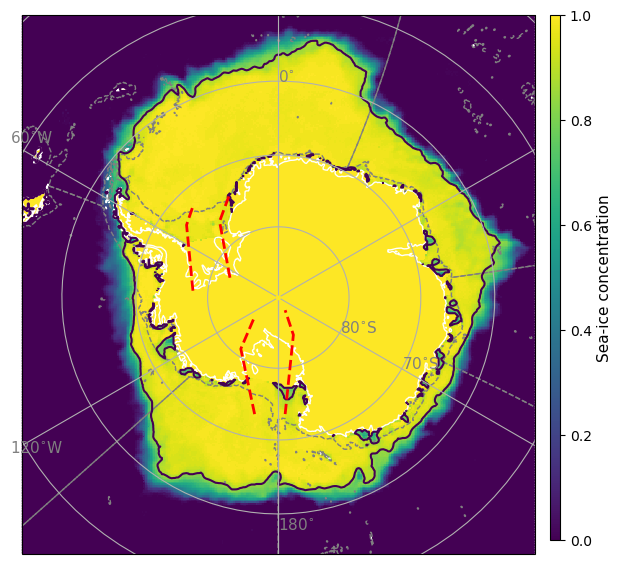

In [19]:
# sections to investigate Ross-Filchner and Ross IS dynamics:
xi_pt = [168, 225, 263, 310]
eta_sec_ini = [310, 330, 120, 120]
eta_sec_end = [440, 460, 270, 280]

bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')


fig = plt.figure(figsize=(7,7))

ax2 = fig.add_subplot(111, projection=proj)
ci = plt.pcolor(ice_xgrid, ice_ygrid, np.squeeze(ice_mm[8,:,:]), transform=ccrs.Stereographic(**kw), vmin=0, vmax=1)
cc = plt.contour(ice_xgrid, ice_ygrid, np.squeeze(ice_mm[8,:,:]),color='lightgray', levels=[.85], transform=ccrs.Stereographic(**kw))
# Weddell
ii=0
plt.plot([lon_rho[eta_sec_ini[ii],xi_pt[ii]], lon_rho[eta_sec_end[ii],xi_pt[ii]]],[lat_rho[eta_sec_ini[ii],xi_pt[ii]], lat_rho[eta_sec_end[ii],xi_pt[ii]]],color='red',transform=ccrs.PlateCarree(),linewidth=2, linestyle='dashed')
ii=1
plt.plot([lon_rho[eta_sec_ini[ii],xi_pt[ii]], lon_rho[eta_sec_end[ii],xi_pt[ii]]],[lat_rho[eta_sec_ini[ii],xi_pt[ii]], lat_rho[eta_sec_end[ii],xi_pt[ii]]],color='red',transform=ccrs.PlateCarree(),linewidth=2, linestyle='dashed')
# Ross Sea
ii=2
plt.plot([lon_rho[eta_sec_ini[ii],xi_pt[ii]], lon_rho[eta_sec_end[ii],xi_pt[ii]]],[lat_rho[eta_sec_ini[ii],xi_pt[ii]], lat_rho[eta_sec_end[ii],xi_pt[ii]]],color='red',transform=ccrs.PlateCarree(),linewidth=2, linestyle='dashed')
ii=3
plt.plot([lon_rho[eta_sec_ini[ii],xi_pt[ii]], lon_rho[eta_sec_end[ii],xi_pt[ii]]],[lat_rho[eta_sec_ini[ii],xi_pt[ii]], lat_rho[eta_sec_end[ii],xi_pt[ii]]],color='red',transform=ccrs.PlateCarree(),linewidth=2, linestyle='dashed')

ax2.gridlines()
ax2.coastlines(resolution='50m',color='white')
ax2.add_feature(bathym, facecolor='none', edgecolor='gray', linestyle='dashed', linewidth=1)
lonlat_labels(ax2)
# colorbar
cbar_axim = fig.add_axes([0.9, 0.13, 0.015, 0.75])
cbar =fig.colorbar(ci, cax=cbar_axim)
plt.ylabel('Sea-ice concentration',fontsize=11)

plt.savefig('/users/boeiradi/COLD_project/postprocessing/figs/NSIDC_September_sea-ice+Transects_RF-RIS.png', dpi=300)

plt.show()

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'color'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


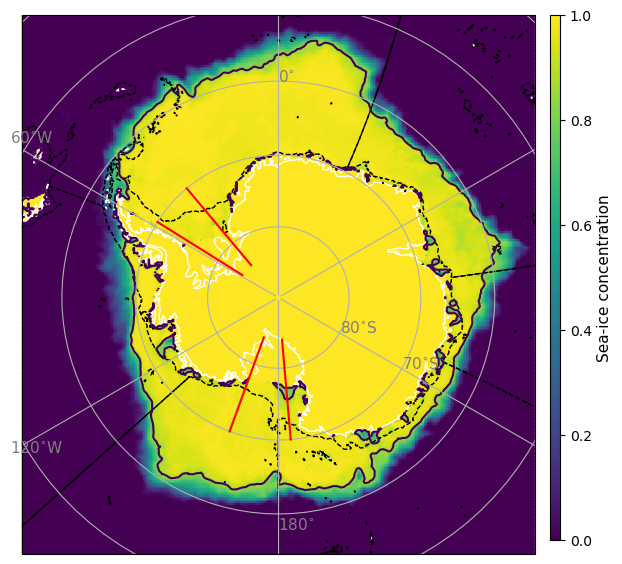

In [12]:
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection=proj)
#cc = plt.pcolormesh(lon_rho, lat_rho, ds.h, transform=ccrs.PlateCarree(), vmin=0, vmax=3000)
ci = plt.pcolor(ice_xgrid, ice_ygrid, np.squeeze(ice_mm[8,:,:]), transform=ccrs.Stereographic(**kw), vmin=0, vmax=1)
cc = plt.contour(ice_xgrid, ice_ygrid, np.squeeze(ice_mm[8,:,:]),color='lightgray', levels=[.85], transform=ccrs.Stereographic(**kw))

ax.gridlines()
ax.coastlines(resolution='50m',color='white')
ax.add_feature(bathym, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)

# Weddell
y0=-84
y1=-70
plt.plot([-58, -58], [y0, y1], 'r-', transform=ccrs.PlateCarree())
plt.plot([-40, -40], [y0, y1], 'r-', transform=ccrs.PlateCarree())
plt.plot([-160, -160], [y0, y1], 'r-', transform=ccrs.PlateCarree())
plt.plot([175, 175], [y0, y1], 'r-', transform=ccrs.PlateCarree())

lonlat_labels(ax)

# colorbar
cbar_axim = fig.add_axes([0.9, 0.13, 0.015, 0.75])
cbar =fig.colorbar(ci, cax=cbar_axim)
plt.ylabel('Sea-ice concentration',fontsize=11)

plt.savefig('/users/boeiradi/COLD_project/postprocessing/figs/NSIDC_September_sea-ice+LonTransects_RF-RIS.png', dpi=300)

plt.show()

(100,) (100,)


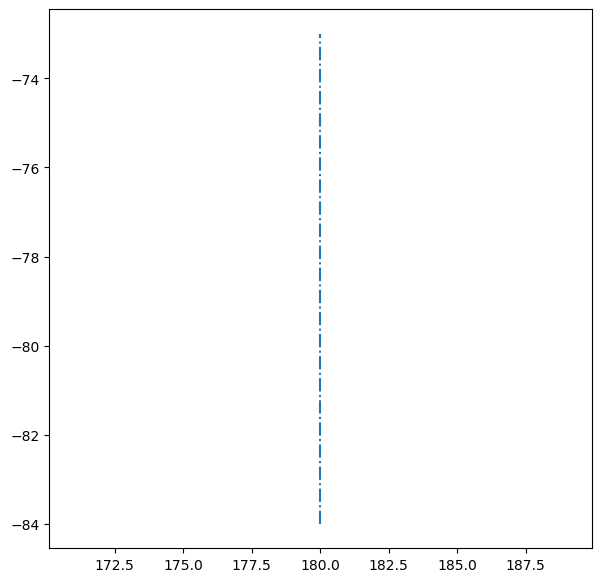

(560, 630) (560, 630)


ValueError: (None,) must be a permuted list of ('eta_rho', 'xi_rho'), unless `...` is included

In [42]:
# testing extracting a line... 
# from (https://stackoverflow.com/questions/7878398/how-to-extract-an-arbitrary-line-of-values-from-a-numpy-array)

# Make a line with "num" points...
x0, y0 = 180, -84 # These are in _pixel_ coordinates!!
x1, y1 = 180, -73
length = 100 #int(np.hypot(x1-x0, y1-y0))
x, y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)

print(x.shape, y.shape)

fig = plt.figure(figsize=(7,7))

ax1 = fig.add_subplot(111)
ax1.plot(x,y,'-.')

plt.show()

## find index
lc = ds.coords["lon_rho"]
la = ds.coords["lat_rho"]

print(lc.shape, la.shape)

np.argwhere(ds.lon_rho<=(x[0]+.05)) 

In [35]:
print(x.dtype, ds.lon_rho.dtype)
print(x[0])

float64 float64
180.0


(560, 630, 31) (31, 560, 630)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

(100,) (31, 100) (31, 100)


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


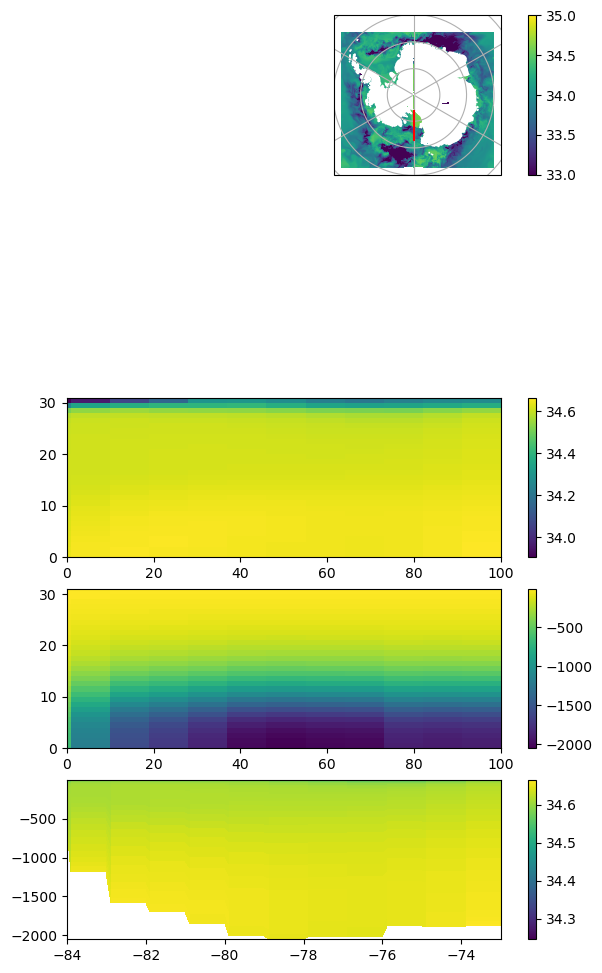

In [36]:

# Extract the values along the line

salt_tst = np.empty((31,length,length))
temp_tst = np.empty((31,length,length))
z_tst = np.empty((31,length,length))

z_rho_mask = ma.array(ds.z_rho.isel(ocean_time=0),mask=np.isnan(ds.z_rho.isel(ocean_time=0)))
salt_mask = ma.array(ds.salt.isel(ocean_time=0),mask=np.isnan(ds.salt.isel(ocean_time=0)))
print(z_rho_mask.shape, salt_mask.shape)

for kk in np.arange(0,31):
    #salt_tst[kk,:,:] = ds.salt.isel(ocean_time=0, s_rho=kk)[x.astype(np.int), y.astype(np.int)]
    salt_tst[kk,:,:] = salt_mask[kk,x.astype(np.int), y.astype(np.int)]
    temp_tst[kk,:,:] = ds.temp.isel(ocean_time=0, s_rho=kk)[x.astype(np.int), y.astype(np.int)]
    #z_tst[kk,:,:] = ds.z_rho.isel(ocean_time=0, s_rho=kk)[x.astype(np.int), y.astype(np.int)]
    z_tst[kk,:,:] = z_rho_mask[x.astype(np.int), y.astype(np.int),kk]
            
lat_tst = y        

print(lat_tst.shape,z_tst[:,0,:].shape,salt_tst[:,0,:].shape)


# plot
fig = plt.figure(figsize=(7,12))

ax1 = fig.add_subplot(511, projection=proj)

cc = plt.pcolormesh(lon_rho,lat_rho,ds.salt.isel(ocean_time=0,s_rho=30), transform=ccrs.PlateCarree(), vmin=33, vmax=35)
plt.colorbar(cc)
ax1.gridlines()
ax1.coastlines(resolution='50m',color='white')
#lonlat_labels(ax)
ax1.plot([x0, x1], [y0, y1], 'r-', transform=ccrs.PlateCarree())


ax3 = fig.add_subplot(513)
cs = ax3.pcolormesh(salt_tst[:,0,:])
plt.colorbar(cs)

ax4 = fig.add_subplot(514)
cz = ax4.pcolormesh(z_tst[:,0,:])
plt.colorbar(cz)

ax5 = fig.add_subplot(515)
cs = ax5.pcolormesh(lat_tst,z_tst[:,0,:],salt_tst[:,0,:])
plt.colorbar(cs)


plt.show()

                   


In [75]:
# create a fixed longitude vector:
#lon_vec = np.array((-60, -50,-160, 170)) # Weddell W, Weddel E, Ross E, Ross W (60W, 50W, 160W, 170E)
#lat_vec = np.array(np.arange(-84,-73))

# Weddell W (60W)
x0, y0 = -58, -84 
x1, y1 = -58, -70
length = int(np.hypot(x1-x0, y1-y0))
x, y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)

# Extract the values along the line
salt_ww = np.empty((12,31,length))
temp_ww = np.empty((12,31,length))
z_ww = np.empty((12,31,length))

for mm in np.arange(0,12):
    z_rho_mask = ma.array(ds.z_rho.isel(ocean_time=mm),mask=np.isnan(ds.z_rho.isel(ocean_time=0)))
    
    for kk in np.arange(0,31):
        salt_tmp = ds.salt.isel(ocean_time=mm, s_rho=kk)[x.astype(np.int), y.astype(np.int)]
        temp_tmp = ds.temp.isel(ocean_time=mm, s_rho=kk)[x.astype(np.int), y.astype(np.int)]
        z_rho_tmp = z_rho_mask[x.astype(np.int), y.astype(np.int),kk]
        
        salt_ww[mm,kk,:] = salt_tmp[0,:]
        temp_ww[mm,kk,:] = temp_tmp[0,:]
        z_ww[mm,kk,:] = z_rho_tmp
    
dens_ww = dens=gsw.rho(salt_ww,temp_ww,0)-1000
lat_ww = y        

## season & annual averages:
z_ww_mask_JFM = np.squeeze(np.nanmean(z_ww_mask[0:2,:,:], axis=0))
z_ww_mask_AMJ = np.squeeze(np.nanmean(z_ww_mask[3:5,:,:], axis=0))
z_ww_mask_JAS = np.squeeze(np.nanmean(z_ww_mask[6:8,:,:], axis=0))
z_ww_mask_OND = np.squeeze(np.nanmean(z_ww_mask[9:11,:,:], axis=0))

temp_ww_JFM = np.squeeze(np.nanmean(temp_ww[0:2,:,:], axis=0))
temp_ww_AMJ = np.squeeze(np.nanmean(temp_ww[3:5,:,:], axis=0))
temp_ww_JAS = np.squeeze(np.nanmean(temp_ww[6:8,:,:], axis=0))
temp_ww_OND = np.squeeze(np.nanmean(temp_ww[9:11,:,:], axis=0))

salt_ww_JFM = np.squeeze(np.nanmean(salt_ww[0:2,:,:], axis=0))
salt_ww_AMJ = np.squeeze(np.nanmean(salt_ww[3:5,:,:], axis=0))
salt_ww_JAS = np.squeeze(np.nanmean(salt_ww[6:8,:,:], axis=0))
salt_ww_OND = np.squeeze(np.nanmean(salt_ww[9:11,:,:], axis=0))

dens_ww_JFM = np.squeeze(np.nanmean(dens_ww[0:2,:,:], axis=0))
dens_ww_AMJ = np.squeeze(np.nanmean(dens_ww[3:5,:,:], axis=0))
dens_ww_JAS = np.squeeze(np.nanmean(dens_ww[6:8,:,:], axis=0))
dens_ww_OND = np.squeeze(np.nanmean(dens_ww[9:11,:,:], axis=0))

z_ww_ann = np.squeeze(np.nanmean(z_ww[:,:,:], axis=0))
temp_ww_ann = np.squeeze(np.nanmean(temp_ww[:,:,:], axis=0))
salt_ww_ann = np.squeeze(np.nanmean(salt_ww[:,:,:], axis=0))
dens_ww_ann = np.squeeze(np.nanmean(dens_ww[:,:,:], axis=0))
                   

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

In [88]:
# Weddell E (50W)
x0, y0 = -40, -84 # These are in _pixel_ coordinates!!
x1, y1 = -40, -70
length = int(np.hypot(x1-x0, y1-y0))
x, y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)

# Extract the values along the line
salt_we = np.empty((12,31,length))
temp_we = np.empty((12,31,length))
z_we = np.empty((12,31,length))

for mm in np.arange(0,12):
    z_rho_mask = ma.array(ds.z_rho.isel(ocean_time=mm),mask=np.isnan(ds.z_rho.isel(ocean_time=0)))
    
    for kk in np.arange(0,31):
        salt_tmp = ds.salt.isel(ocean_time=mm, s_rho=kk)[x.astype(np.int), y.astype(np.int)]
        temp_tmp = ds.temp.isel(ocean_time=mm, s_rho=kk)[x.astype(np.int), y.astype(np.int)]
        z_rho_tmp = z_rho_mask[x.astype(np.int), y.astype(np.int),kk]
        
        salt_we[mm,kk,:] = salt_tmp[0,:]
        temp_we[mm,kk,:] = temp_tmp[0,:]
        z_we[mm,kk,:] = z_rho_tmp
    
dens_we = dens=gsw.rho(salt_we,temp_we,0)-1000
lat_we = y        

## season & annual averages:
z_we_JFM = np.squeeze(np.nanmean(z_we[0:2,:,:], axis=0))
z_we_AMJ = np.squeeze(np.nanmean(z_we[3:5,:,:], axis=0))
z_we_JAS = np.squeeze(np.nanmean(z_we[6:8,:,:], axis=0))
z_we_OND = np.squeeze(np.nanmean(z_we[9:11,:,:], axis=0))

temp_we_JFM = np.squeeze(np.nanmean(temp_we[0:2,:,:], axis=0))
temp_we_AMJ = np.squeeze(np.nanmean(temp_we[3:5,:,:], axis=0))
temp_we_JAS = np.squeeze(np.nanmean(temp_we[6:8,:,:], axis=0))
temp_we_OND = np.squeeze(np.nanmean(temp_we[9:11,:,:], axis=0))

salt_we_JFM = np.squeeze(np.nanmean(salt_we[0:2,:,:], axis=0))
salt_we_AMJ = np.squeeze(np.nanmean(salt_we[3:5,:,:], axis=0))
salt_we_JAS = np.squeeze(np.nanmean(salt_we[6:8,:,:], axis=0))
salt_we_OND = np.squeeze(np.nanmean(salt_we[9:11,:,:], axis=0))

dens_we_JFM = np.squeeze(np.nanmean(dens_we[0:2,:,:], axis=0))
dens_we_AMJ = np.squeeze(np.nanmean(dens_we[3:5,:,:], axis=0))
dens_we_JAS = np.squeeze(np.nanmean(dens_we[6:8,:,:], axis=0))
dens_we_OND = np.squeeze(np.nanmean(dens_we[9:11,:,:], axis=0))

z_we_ann = np.squeeze(np.nanmean(z_we[:,:,:], axis=0))
temp_we_ann = np.squeeze(np.nanmean(temp_we[:,:,:], axis=0))
salt_we_ann = np.squeeze(np.nanmean(salt_we[:,:,:], axis=0))
dens_we_ann = np.squeeze(np.nanmean(dens_we[:,:,:], axis=0))

                   

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wis

In [89]:
# Ross E (160W)
x0, y0 = -160, -84 # These are in _pixel_ coordinates!!
x1, y1 = -160, -70
length = int(np.hypot(x1-x0, y1-y0))
x, y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)

# Extract the values along the line
salt_re = np.empty((12,31,length))
temp_re = np.empty((12,31,length))
z_re = np.empty((12,31,length))

for mm in np.arange(0,12):
    z_rho_mask = ma.array(ds.z_rho.isel(ocean_time=mm),mask=np.isnan(ds.z_rho.isel(ocean_time=0)))
    
    for kk in np.arange(0,31):
        salt_tmp = ds.salt.isel(ocean_time=mm, s_rho=kk)[x.astype(np.int), y.astype(np.int)]
        temp_tmp = ds.temp.isel(ocean_time=mm, s_rho=kk)[x.astype(np.int), y.astype(np.int)]
        z_rho_tmp = z_rho_mask[x.astype(np.int), y.astype(np.int),kk]
        
        salt_re[mm,kk,:] = salt_tmp[0,:]
        temp_re[mm,kk,:] = temp_tmp[0,:]
        z_re[mm,kk,:] = z_rho_tmp
    
dens_re = dens=gsw.rho(salt_re,temp_re,0)-1000
lat_re = y        

## season & annual averages:
z_re_JFM = np.squeeze(np.nanmean(z_re[0:2,:,:], axis=0))
z_re_AMJ = np.squeeze(np.nanmean(z_re[3:5,:,:], axis=0))
z_re_JAS = np.squeeze(np.nanmean(z_re[6:8,:,:], axis=0))
z_re_OND = np.squeeze(np.nanmean(z_re[9:11,:,:], axis=0))

temp_re_JFM = np.squeeze(np.nanmean(temp_re[0:2,:,:], axis=0))
temp_re_AMJ = np.squeeze(np.nanmean(temp_re[3:5,:,:], axis=0))
temp_re_JAS = np.squeeze(np.nanmean(temp_re[6:8,:,:], axis=0))
temp_re_OND = np.squeeze(np.nanmean(temp_re[9:11,:,:], axis=0))

salt_re_JFM = np.squeeze(np.nanmean(salt_re[0:2,:,:], axis=0))
salt_re_AMJ = np.squeeze(np.nanmean(salt_re[3:5,:,:], axis=0))
salt_re_JAS = np.squeeze(np.nanmean(salt_re[6:8,:,:], axis=0))
salt_re_OND = np.squeeze(np.nanmean(salt_re[9:11,:,:], axis=0))

dens_re_JFM = np.squeeze(np.nanmean(dens_re[0:2,:,:], axis=0))
dens_re_AMJ = np.squeeze(np.nanmean(dens_re[3:5,:,:], axis=0))
dens_re_JAS = np.squeeze(np.nanmean(dens_re[6:8,:,:], axis=0))
dens_re_OND = np.squeeze(np.nanmean(dens_re[9:11,:,:], axis=0))

z_re_ann = np.squeeze(np.nanmean(z_re[:,:,:], axis=0))
temp_re_ann = np.squeeze(np.nanmean(temp_re[:,:,:], axis=0))
salt_re_ann = np.squeeze(np.nanmean(salt_re[:,:,:], axis=0))
dens_re_ann = np.squeeze(np.nanmean(dens_re[:,:,:], axis=0))

                   

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wis

In [90]:
# Ross E (170E)
x0, y0 = 175, -84 # These are in _pixel_ coordinates!!
x1, y1 = 175, -70
length = int(np.hypot(x1-x0, y1-y0))
x, y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)

# Extract the values along the line
salt_rw = np.empty((12,31,length))
temp_rw = np.empty((12,31,length))
z_rw = np.empty((12,31,length))

for mm in np.arange(0,12):
    z_rho_mask = ma.array(ds.z_rho.isel(ocean_time=mm),mask=np.isnan(ds.z_rho.isel(ocean_time=0)))
    
    for kk in np.arange(0,31):
        salt_tmp = ds.salt.isel(ocean_time=mm, s_rho=kk)[x.astype(np.int), y.astype(np.int)]
        temp_tmp = ds.temp.isel(ocean_time=mm, s_rho=kk)[x.astype(np.int), y.astype(np.int)]
        z_rho_tmp = z_rho_mask[x.astype(np.int), y.astype(np.int),kk]
        
        salt_rw[mm,kk,:] = salt_tmp[0,:]
        temp_rw[mm,kk,:] = temp_tmp[0,:]
        z_rw[mm,kk,:] = z_rho_tmp
    
dens_rw = dens=gsw.rho(salt_rw,temp_rw,0)-1000
lat_rw = y        

## season & annual averages:
z_rw_JFM = np.squeeze(np.nanmean(z_rw[0:2,:,:], axis=0))
z_rw_AMJ = np.squeeze(np.nanmean(z_rw[3:5,:,:], axis=0))
z_rw_JAS = np.squeeze(np.nanmean(z_rw[6:8,:,:], axis=0))
z_rw_OND = np.squeeze(np.nanmean(z_rw[9:11,:,:], axis=0))

temp_rw_JFM = np.squeeze(np.nanmean(temp_rw[0:2,:,:], axis=0))
temp_rw_AMJ = np.squeeze(np.nanmean(temp_rw[3:5,:,:], axis=0))
temp_rw_JAS = np.squeeze(np.nanmean(temp_rw[6:8,:,:], axis=0))
temp_rw_OND = np.squeeze(np.nanmean(temp_rw[9:11,:,:], axis=0))

salt_rw_JFM = np.squeeze(np.nanmean(salt_rw[0:2,:,:], axis=0))
salt_rw_AMJ = np.squeeze(np.nanmean(salt_rw[3:5,:,:], axis=0))
salt_rw_JAS = np.squeeze(np.nanmean(salt_rw[6:8,:,:], axis=0))
salt_rw_OND = np.squeeze(np.nanmean(salt_rw[9:11,:,:], axis=0))

dens_rw_JFM = np.squeeze(np.nanmean(dens_rw[0:2,:,:], axis=0))
dens_rw_AMJ = np.squeeze(np.nanmean(dens_rw[3:5,:,:], axis=0))
dens_rw_JAS = np.squeeze(np.nanmean(dens_rw[6:8,:,:], axis=0))
dens_rw_OND = np.squeeze(np.nanmean(dens_rw[9:11,:,:], axis=0))

z_rw_ann = np.squeeze(np.nanmean(z_rw[:,:,:], axis=0))
temp_rw_ann = np.squeeze(np.nanmean(temp_rw[:,:,:], axis=0))
salt_rw_ann = np.squeeze(np.nanmean(salt_rw[:,:,:], axis=0))
dens_rw_ann = np.squeeze(np.nanmean(dens_rw[:,:,:], axis=0))

                   

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wis

In [91]:
print(len(lat_we))

14


In [92]:
fig_path='/users/boeiradi/COLD_project/postprocessing/figs/Cross_sections/'


/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: shading='flat' when X and 

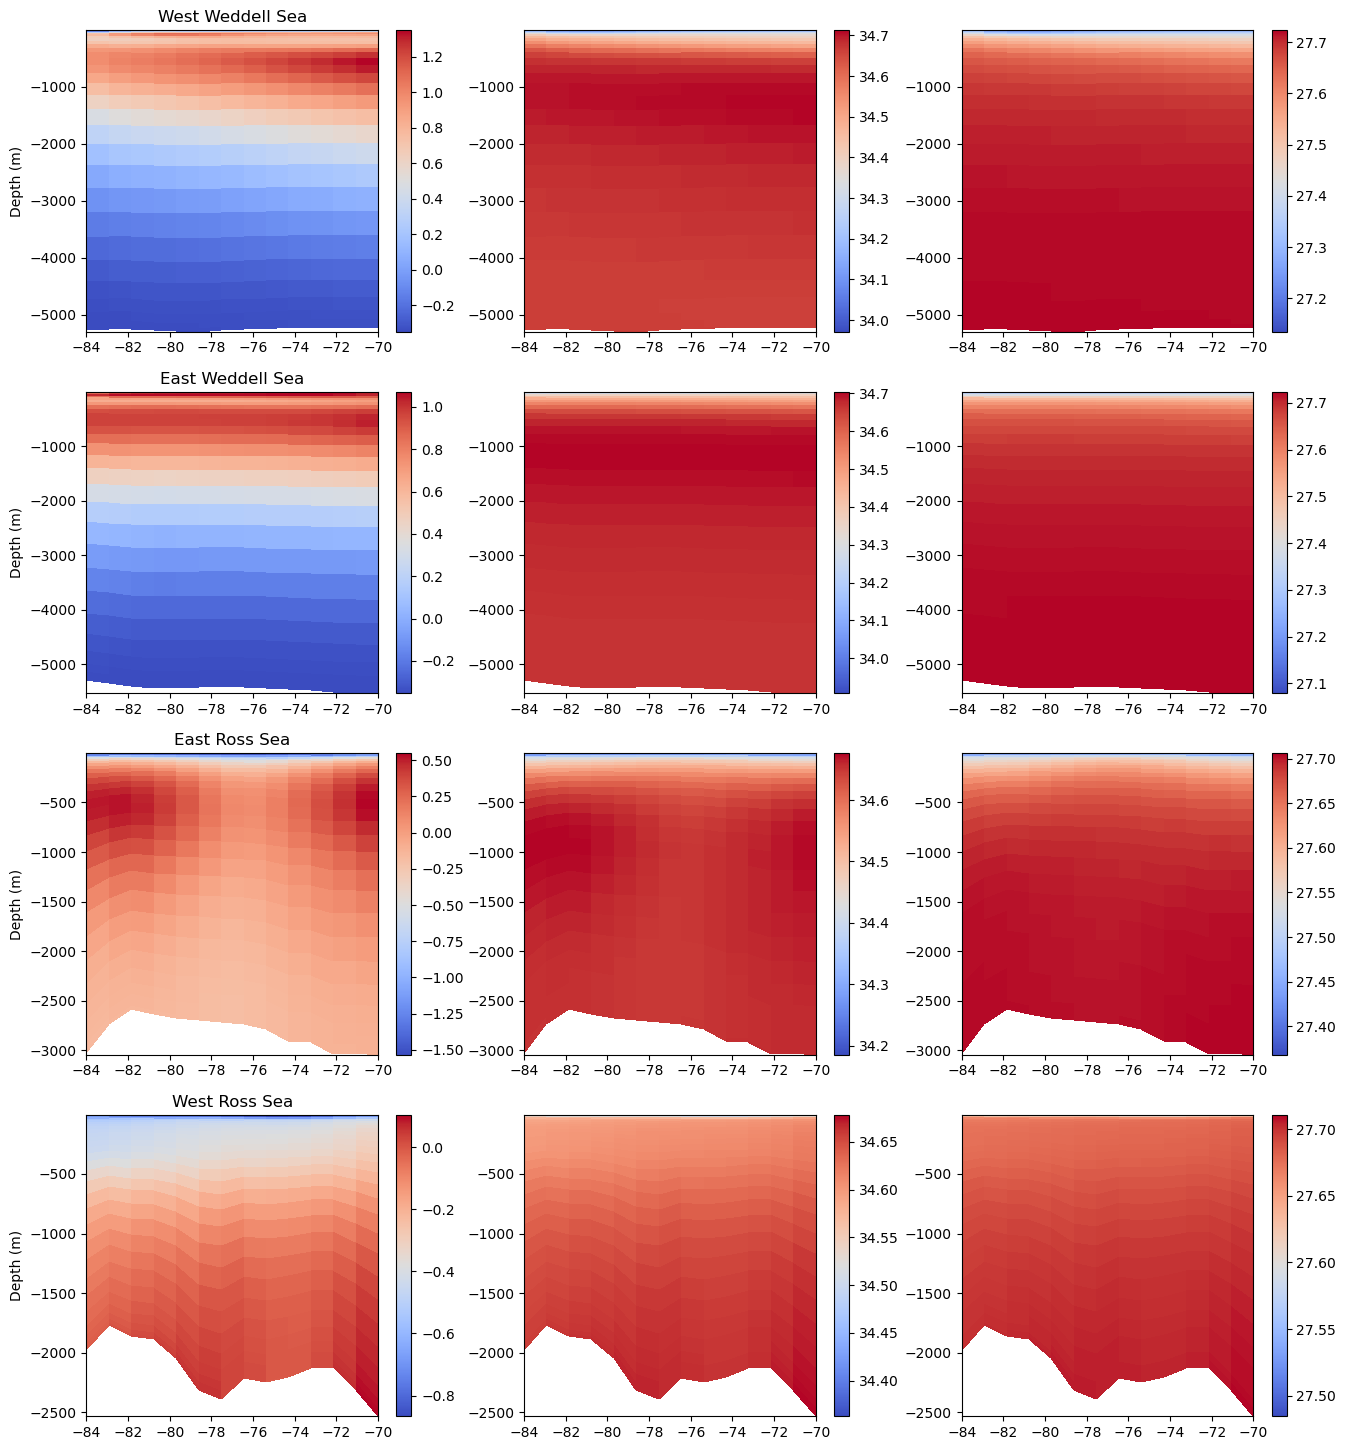

In [93]:
# Plot transects: Annual

levelsT = np.arange(-2.,2.,.25)
levelsS = np.arange(34.5,34.8,.05)
levelsR = np.arange(27.2,27.8,.025)

# Weddell
fig = plt.figure(figsize=(16,18))
ax1 = fig.add_subplot(4,3,1)
#cs = ax5.pcolormesh(lat_tst,z_tst[:,0,:],salt_tst[:,0,:])
#ct = plt.pcolormesh(lat_ww, z_ww_ann,temp_ww_ann,cmap=plt.cm.coolwarm)
ct = plt.pcolormesh(lat_ww, z_ww_ann,temp_ww_ann, cmap=plt.cm.coolwarm)
##plt.contour(lat_ww, z_ww_ann,temp_ww_ann, colors='k', levels=levelsT)
##plt.contour(lat_ww, z_ww_ann,dens_ww_ann, colors='w', levels=levelsR)
plt.colorbar(ct)
#plt.xlim([-78.,-73.])
#plt.ylim([-1500,0])
plt.title('West Weddell Sea')
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude')

ax2 = fig.add_subplot(4,3,2)
cs = plt.pcolormesh(lat_ww, z_ww_ann,salt_ww_ann,cmap=plt.cm.coolwarm)
##plt.contour(lat_ww, z_ww_ann,salt_ww_ann, colors='k', levels=levelsS)
##plt.contour(lat_ww, z_ww_ann,dens_ww_ann, colors='w', levels=levelsR)
plt.colorbar(cs)
#plt.xlim([-78.,-73.])
#plt.ylim([-1500,0])
#plt.xlabel('Latitude')

ax3 = fig.add_subplot(4,3,3)
cr = plt.pcolormesh(lat_ww, z_ww_ann,dens_ww_ann,cmap=plt.cm.coolwarm)
##plt.contour(lat_ww, z_ww_ann,dens_ww_ann, colors='w', levels=levelsR)
plt.colorbar(cr)
#plt.xlim([-78.,-73.])
#plt.ylim([-1500,0])

ax4 = fig.add_subplot(4,3,4)
ct = plt.pcolormesh(lat_we, z_we_ann,temp_we_ann,cmap=plt.cm.coolwarm)
#plt.contour(lat_we, z_we_ann,temp_we_ann, colors='k', levels=levelsT)
#plt.contour(lat_we, z_we_ann,dens_we_ann, colors='w', levels=levelsR)
plt.colorbar(ct)
#plt.xlim([-78.,-73.])
#plt.ylim([-1500,0])
plt.title('East Weddell Sea')
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude')

ax5 = fig.add_subplot(4,3,5)
cs = plt.pcolormesh(lat_we, z_we_ann,salt_we_ann,cmap=plt.cm.coolwarm)
#plt.contour(lat_we, z_we_ann,salt_we_ann, colors='k', levels=levelsS)
#plt.contour(lat_we, z_we_ann,dens_we_ann, colors='w', levels=levelsR)
plt.colorbar(cs)
#plt.xlim([-78.,-73.])
#plt.ylim([-1500,0])
#plt.xlabel('Latitude')

ax6 = fig.add_subplot(4,3,6)
cr = plt.pcolormesh(lat_we, z_we_ann,dens_we_ann,cmap=plt.cm.coolwarm)
#plt.contour(lat_we, z_we_ann,dens_we_ann, colors='w', levels=levelsR)
plt.colorbar(cr)
#plt.xlim([-78.,-73.])
#plt.ylim([-1500,0])

ax7 = fig.add_subplot(4,3,7)
ct = plt.pcolormesh(lat_re, z_re_ann,temp_re_ann,cmap=plt.cm.coolwarm)
#plt.contour(lat_re, z_re_ann,temp_re_ann, colors='k', levels=levelsT)
#plt.contour(lat_re, z_re_ann,dens_re_ann, colors='w', levels=levelsR)
plt.colorbar(ct)
#plt.xlim([-78.,-73.])
#plt.ylim([-1500,0])
plt.title('East Ross Sea')
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude')

ax8 = fig.add_subplot(4,3,8)
cs = plt.pcolormesh(lat_re, z_re_ann,salt_re_ann,cmap=plt.cm.coolwarm)
#plt.contour(lat_re, z_re_ann,salt_re_ann, colors='k', levels=levelsS)
#plt.contour(lat_re, z_re_ann,dens_re_ann, colors='w', levels=levelsR)
plt.colorbar(cs)
#plt.xlim([-78.,-73.])
#plt.ylim([-1500,0])
#plt.xlabel('Latitude')

ax9 = fig.add_subplot(4,3,9)
cr = plt.pcolormesh(lat_re, z_re_ann,dens_re_ann,cmap=plt.cm.coolwarm)
#plt.contour(lat_re, z_re_ann,dens_re_ann, colors='w', levels=levelsR)
plt.colorbar(cr)
#plt.xlim([-78.,-73.])
#plt.ylim([-1500,0])

ax10 = fig.add_subplot(4,3,10)
ct = plt.pcolormesh(lat_rw, z_rw_ann,temp_rw_ann,cmap=plt.cm.coolwarm)
#plt.contour(lat_rw, z_rw_ann,temp_rw_ann, colors='k', levels=levelsT)
#plt.contour(lat_rw, z_rw_ann,dens_rw_ann, colors='w', levels=levelsR)
plt.colorbar(ct)
#plt.xlim([-78.,-73.])
#plt.ylim([-1500,0])
plt.title('West Ross Sea')
plt.ylabel('Depth (m)')
#plt.xlabel('Latitude')

ax11 = fig.add_subplot(4,3,11)
cs = plt.pcolormesh(lat_rw, z_rw_ann,salt_rw_ann,cmap=plt.cm.coolwarm)
#plt.contour(lat_rw, z_rw_ann,salt_rw_ann, colors='k', levels=levelsS)
#plt.contour(lat_rw, z_rw_ann,dens_rw_ann, colors='w', levels=levelsR)
plt.colorbar(cs)
#plt.xlim([-78.,-73.])
#plt.ylim([-1500,0])
#plt.xlabel('Latitude')

ax12 = fig.add_subplot(4,3,12)
cr = plt.pcolormesh(lat_rw, z_rw_ann,dens_rw_ann,cmap=plt.cm.coolwarm)
#plt.contour(lat_rw, z_rw_ann,dens_rw_ann, colors='w', levels=levelsR)
plt.colorbar(cr)
#plt.xlim([-78.,-73.])
#plt.ylim([-1500,0])


name_fig="waom10extend_wedW_InterpLon_section_annual_yr20.png"
plt.savefig(fig_path + name_fig)

plt.show()